### 작품 분야별  - 가격 하위 20%의 최대값 계산
- 작품들의 80%는 이 값과 같거나 크다
- 이 작가의 작품을 사려면 최소 이 정도 비용을 준비해놓는 것이 좋다. 
- 미니멈 예상 투자 액수 추정 - 작가 자체를 알아볼 시간을 단축

##### 1. 필요 라이브러리 및 데이터 불러오기

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# 작가명 지정
MAKER_NAME = "picasso"

# 분야명 리스트 (추가/삭제 가능)
fields = [
    "Drawing", "Gouache Painting", "Oil Painting", 
    "Print", "Watercolor Painting", "Acrylic Painting"
]

# 데이터프레임을 저장할 딕셔너리
df_dict = {}

# 각 분야별 CSV 파일을 확인 후 로드
for field in fields:
    file_path = f"../data/{MAKER_NAME}_{field}.csv"
    
    if os.path.exists(file_path):  # 파일 존재 여부 확인
        df_dict[field] = pd.read_csv(file_path)
    else:
        print(f"There is no {field} in {MAKER_NAME}'s Artworks")

# 개별 DataFrame 접근 예시
df_dict['Drawing'].head()

There is no Acrylic Painting in picasso's Artworks


,artist,title,end_date,estimate_USD,price_USD,auction_site,year,artwork_type,edition,height_cm,width_cm,start_date,low_estimate,high_estimate,price,currency,low_estimate_USD,high_estimate_USD,estimateCurrency,type
0,Pablo_Picasso,Portrait d'homme,2011-05-05T00:00:00,"USD 250,000 - 350,000",578500.0,Christies,1900.0,watercolor and charcoal on paper,NaN,48.9,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawing
1,Pablo_Picasso,Deux nus féminins,2011-05-05T00:00:00,"USD 60,000 - 80,000",92500.0,Christies,1920.0,pencil on paper,NaN,20.0,27.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawing
2,Pablo_Picasso,Femme pensive,2011-05-05T00:00:00,"USD 20,000 - 30,000",43750.0,Christies,NaN,femme pensive,NaN,27.9,28.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawing
3,Pablo_Picasso,Minotaure,2011-05-05T00:00:00,"USD 100,000 - 150,000",230500.0,Christies,1948.0,"gouache, pen and india ink and brush and gray ...",NaN,27.0,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawing
4,Pablo_Picasso,Tête d'homme,2011-05-05T00:00:00,"USD 150,000 - 250,000",302500.0,Christies,1966.0,pastel and colored wax crayons on board,NaN,31.0,23.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawing


##### 2. 데이터의 가격 열 전처리

In [17]:
# price_USD가 NaN인 데이터 제거
for field, df in df_dict.items():
    df.dropna(subset=['price_USD'], inplace=True)
    

df_dict['Drawing'].head()

,artist,title,end_date,estimate_USD,price_USD,auction_site,year,artwork_type,edition,height_cm,width_cm,start_date,low_estimate,high_estimate,price,currency,low_estimate_USD,high_estimate_USD,estimateCurrency,type
0,Pablo_Picasso,Portrait d'homme,2011-05-05T00:00:00,"USD 250,000 - 350,000",578500.0,Christies,1900.0,watercolor and charcoal on paper,NaN,48.9,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawing
1,Pablo_Picasso,Deux nus féminins,2011-05-05T00:00:00,"USD 60,000 - 80,000",92500.0,Christies,1920.0,pencil on paper,NaN,20.0,27.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawing
2,Pablo_Picasso,Femme pensive,2011-05-05T00:00:00,"USD 20,000 - 30,000",43750.0,Christies,NaN,femme pensive,NaN,27.9,28.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawing
3,Pablo_Picasso,Minotaure,2011-05-05T00:00:00,"USD 100,000 - 150,000",230500.0,Christies,1948.0,"gouache, pen and india ink and brush and gray ...",NaN,27.0,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawing
4,Pablo_Picasso,Tête d'homme,2011-05-05T00:00:00,"USD 150,000 - 250,000",302500.0,Christies,1966.0,pastel and colored wax crayons on board,NaN,31.0,23.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawing


##### 3. 분야별 가격 하위 20%의 최댓값 계산

In [18]:
# 하위 20% 가격 데이터의 최댓값 저장
percentile_20s = {}

for field, df in df_dict.items():
    tmp = df['price_USD'].quantile(0.2)
    percentile_20s[field] = round(tmp, 2)

# 데이터프레임들을 하위 20%의 최댓값이 큰 순서로 정렬
df_dict = dict(sorted(df_dict.items(), key=lambda x: percentile_20s[x[0]], reverse=True))
for field, df in df_dict.items():
    print(f"  - {field}: {percentile_20s[field]}")

  - Oil Painting: 1341207.8
  - Gouache Painting: 90132.0
  - Watercolor Painting: 88504.43
  - Drawing: 40874.81
  - Print: 5091.32


##### 4. 각 분야별 전체 분포도와 하위 20%값 비교 시각화

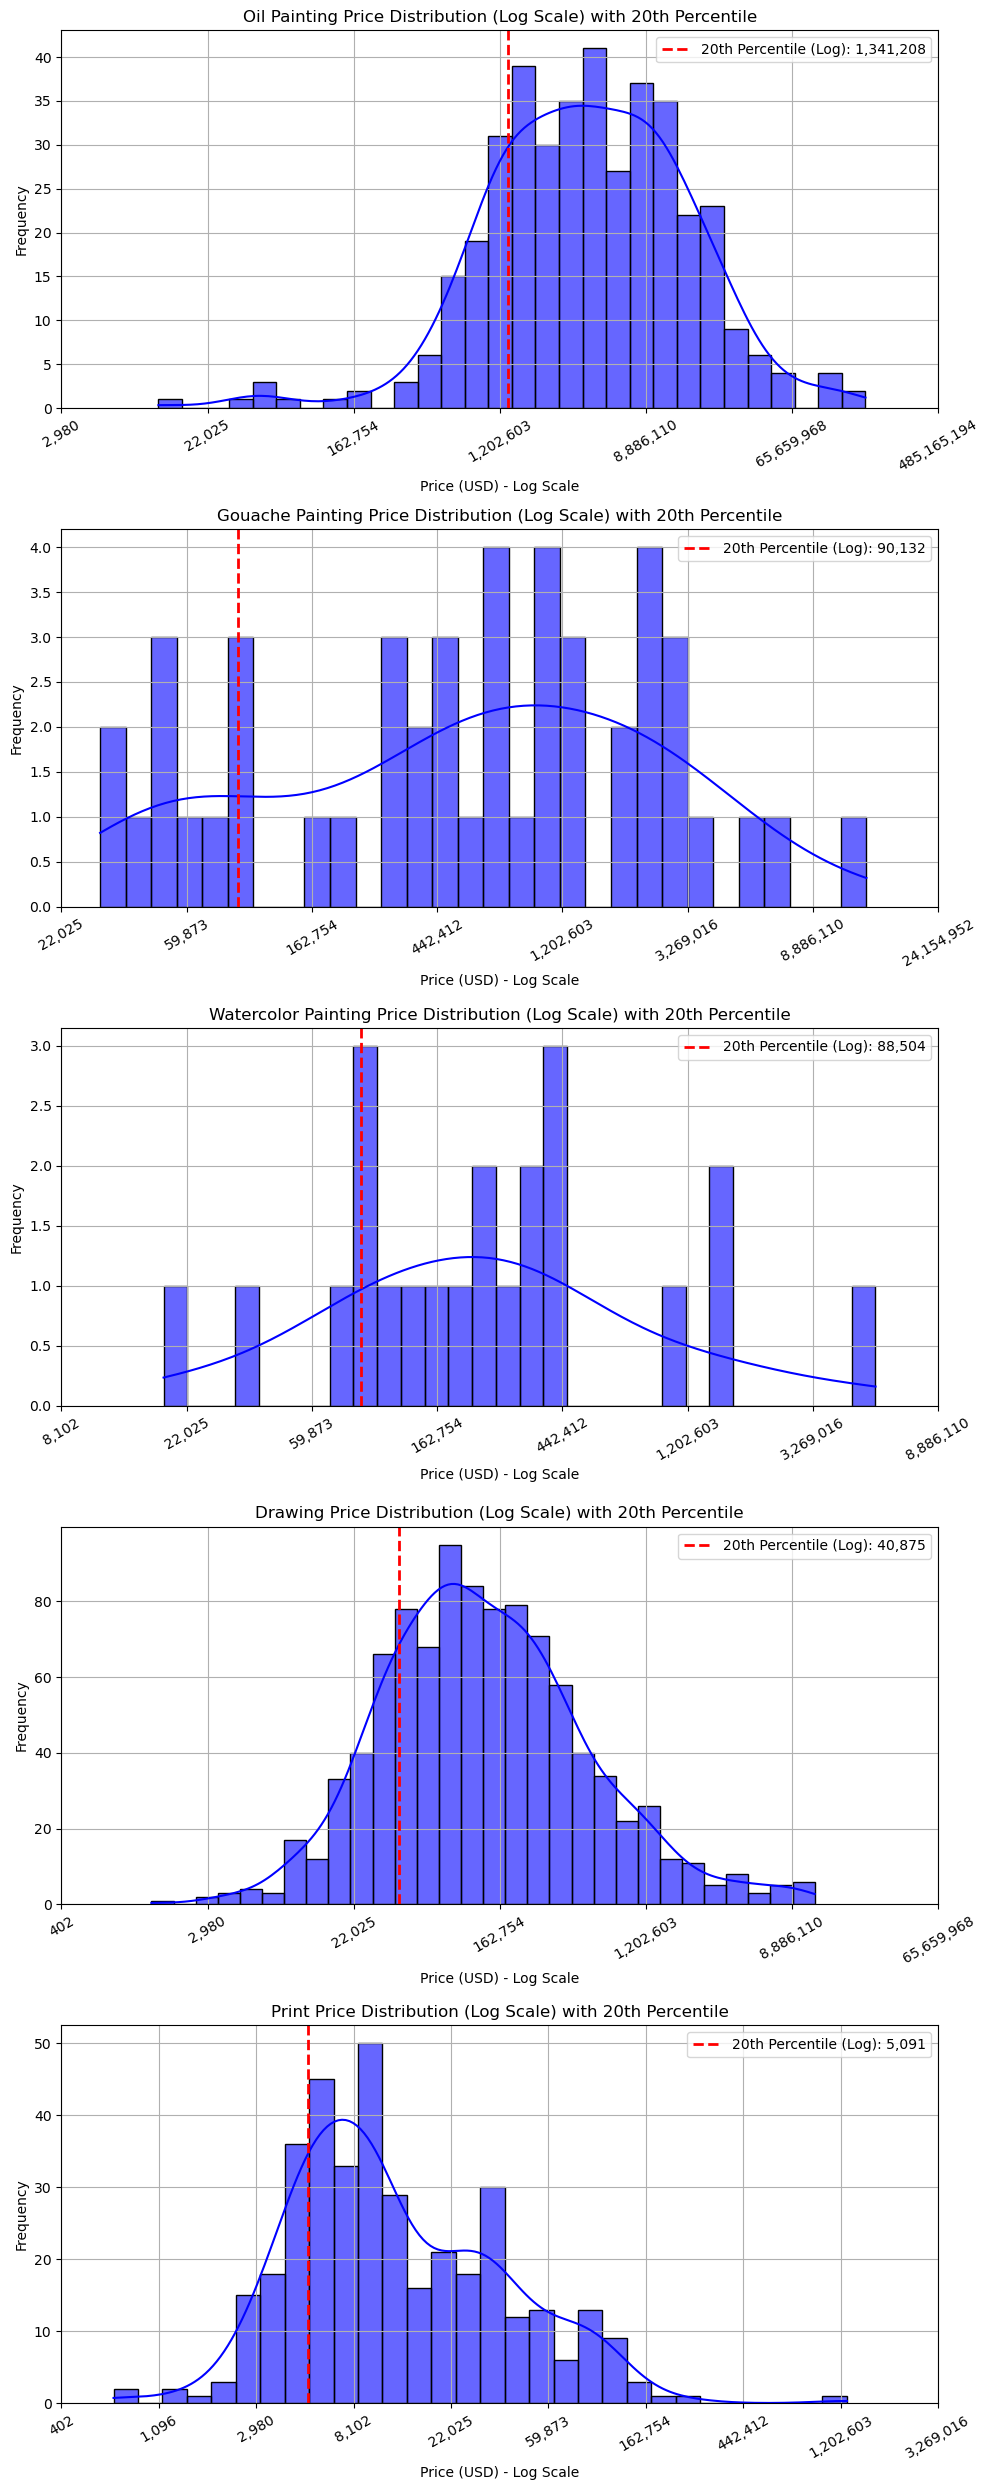

In [19]:
# 그래프 크기 및 레이아웃 설정
num_fields = len(df_dict)  # 분야 개수
fig, axes = plt.subplots(num_fields, 1, figsize=(10, 5 * num_fields))  # 세로로 배치

for i, (field, df) in enumerate(df_dict.items()):
    per_20 = percentile_20s[field]
    ax = axes[i] if num_fields > 1 else axes

    # 가격 데이터의 로그 변환 (왜곡된 분포 조정)
    log_prices = np.log1p(df['price_USD'])  # log(1 + price) 적용

    # 가격 분포 히스토그램
    sns.histplot(log_prices, bins=30, kde=True, ax=ax, color='blue', alpha=0.6)

    # 20분위수 수직선 추가 (로그 변환된 값으로 변환하여 표시)
    log_percentile_20 = np.log1p(per_20)
    ax.axvline(log_percentile_20, color='red', linestyle='dashed', linewidth=2, label=f'20th Percentile (Log): {per_20:,.0f}')

    # X축을 원래 가격 범위로 변환하여 보기 좋게 표시
    xticks = ax.get_xticks()  # 현재 자동 설정된 x축 눈금값 가져오기
    xticks_labels = [f"{np.expm1(x):,.0f}" for x in xticks]  # 로그값을 원래 가격으로 변환
    ax.set_xticks(xticks, xticks_labels, rotation=30)  # 변환된 값으로 x축 설정

    # 그래프 설정
    ax.set_xlabel("Price (USD) - Log Scale")
    ax.set_ylabel("Frequency")
    ax.set_title(f"{field} Price Distribution (Log Scale) with 20th Percentile")
    ax.legend()
    ax.grid(True)

# 그래프 출력
# 그래프 간 간격 조정
plt.tight_layout()
plt.show()